In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import signal
from scipy import stats

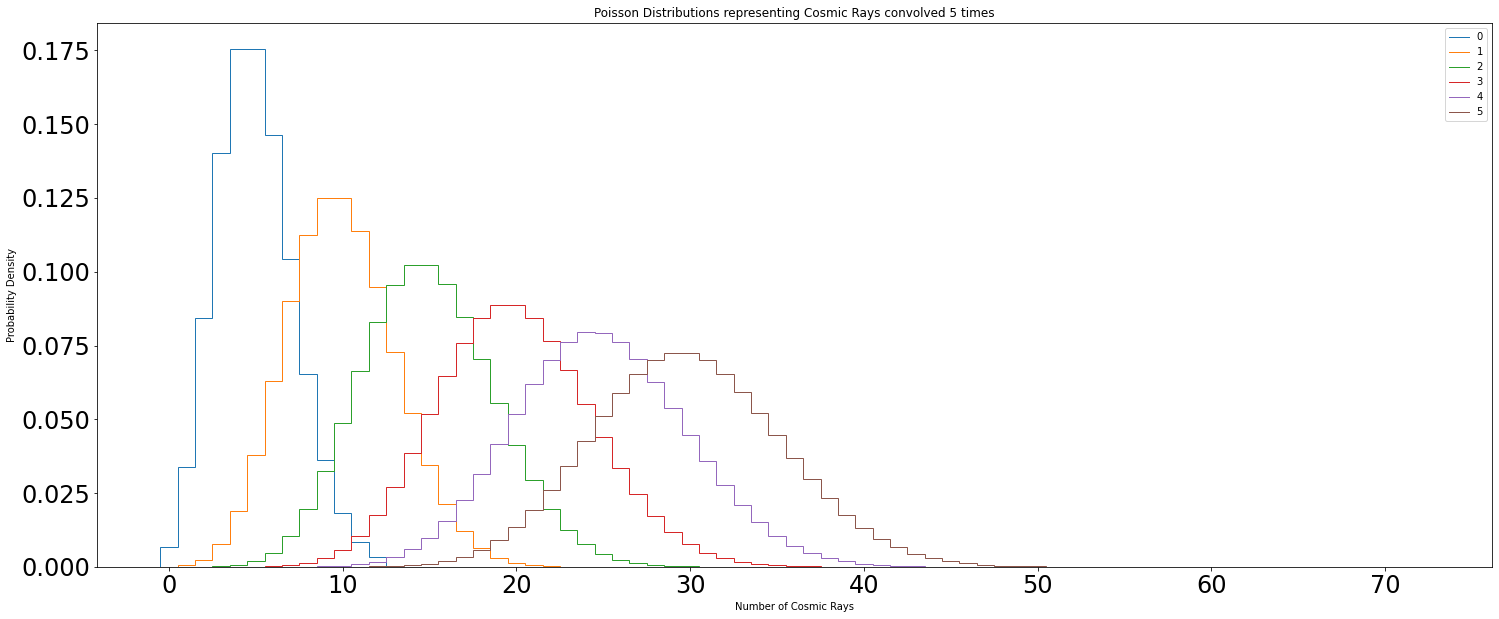

In [7]:
# Problem 1.A

plt.rcParams["figure.figsize"] = (25,10)
fig, ax = plt.subplots(1, 1)
ax.tick_params(labelsize = 24)

X = 5
Y = 8

x = np.arange(stats.poisson.ppf(0.001, X, 0), stats.poisson.ppf(0.999, X, 0))
edges = np.arange(x[0]-0.5, x[-1]+1.5, 1)
pmf_values = stats.poisson.pmf(x, X, 0)
ax.stairs(pmf_values, edges, label = 0)
conv = pmf_values
plt.title('Poisson Distributions representing Cosmic Rays convolved 5 times')
plt.xlabel('Number of Cosmic Rays')
plt.ylabel('Probability Density')

for i in range(5):
    conv = np.convolve(conv, pmf_values)
    x = np.arange(0,len(conv))
    edges = np.arange(x[0]-0.5, x[-1]+1.5, 1)
    ax.stairs(conv, edges, label= i + 1)
plt.legend()

The above plot shows the distribution of cosmic rays with a mean of 5, being convolved 0-5 times.

Text(0.5, 1.0, 'Poisson distribution convovlved 5 times vs new Poisson distribution created with same parameters as the convolved distribution')

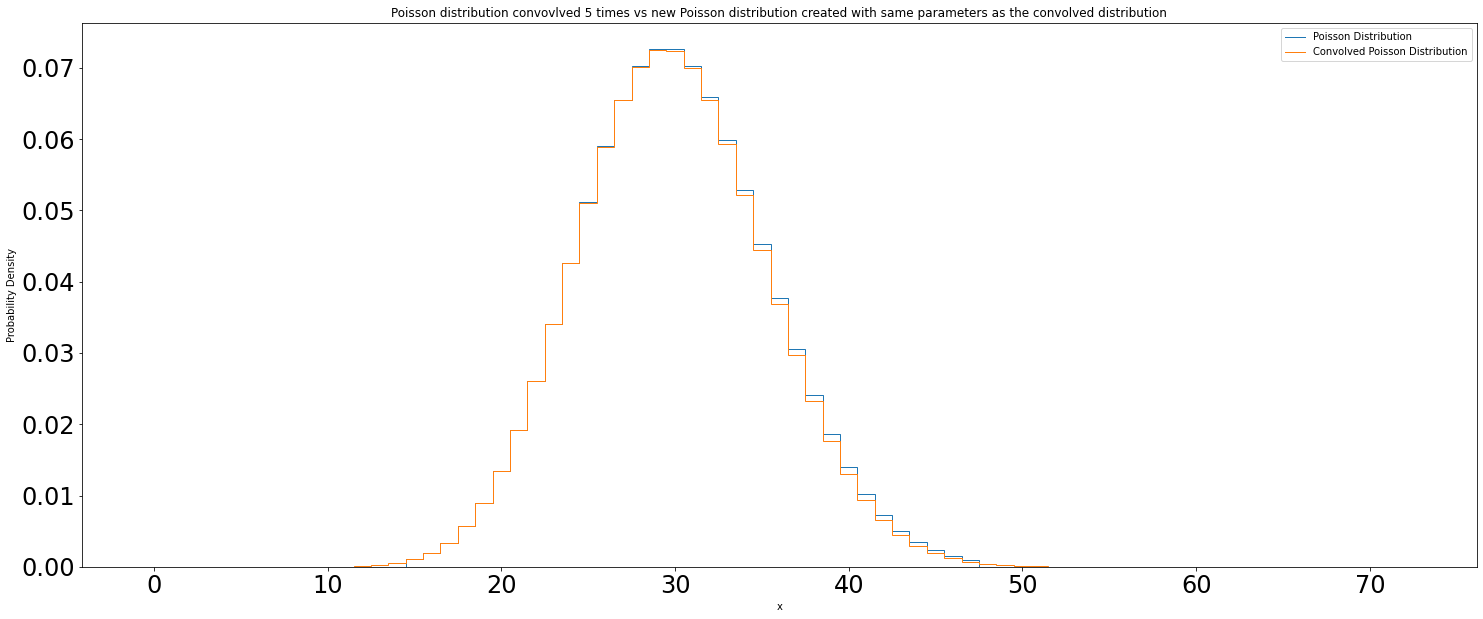

In [8]:
# Problem 1.B

plt.rcParams["figure.figsize"] = (25,10)
fig, ax = plt.subplots(1, 1)
ax.tick_params(labelsize = 24)

mu = 30
x = np.arange(stats.poisson.ppf(0.001, 30, 0), stats.poisson.ppf(0.999, 30, 0))
edges = np.arange(x[0]-0.5, x[-1]+1.5, 1)
pmf_values = stats.poisson.pmf(x, 30, 0)
ax.stairs(pmf_values, edges, label='Poisson Distribution')
x = np.arange(0,len(conv))
edges = np.arange(x[0]-0.5, x[-1]+1.5, 1)
ax.stairs(conv, edges, label='Convolved Poisson Distribution')
plt.legend()
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Poisson distribution convovlved 5 times vs new Poisson distribution created with same parameters as the convolved distribution')

Problem 1.B

The plot above shows the poisson distribution for the data after being convolved 5 times to represent 5 days of observations, and a poisson distribution with the same parameters as the convolved poisson distribution of the data. It can bee seen that these two distributions are nearly identical, and can them be shown that the convolved distribution is still a poisson distribution.

This makes sense conceptually because each time you convolve the distribution, a new poisson distribution is created, just with different parameters compared to the original ones being convolved. If the parameters are updated enough, then the poisson distribution begins to take the shape of a gaussian, even though it is still a poisson distribution.

Mathematically, this makes sense, as the poisson distribution represents the probability density of numbers of events occuring happening within a time period. Summing multiple distributions is akin to measuring the probability for a greater time period, given the means of the two distributions are equal. This would result in a larger mean, that is equal to the sum of the means for each distribution being convolved.

0.9879478623455842


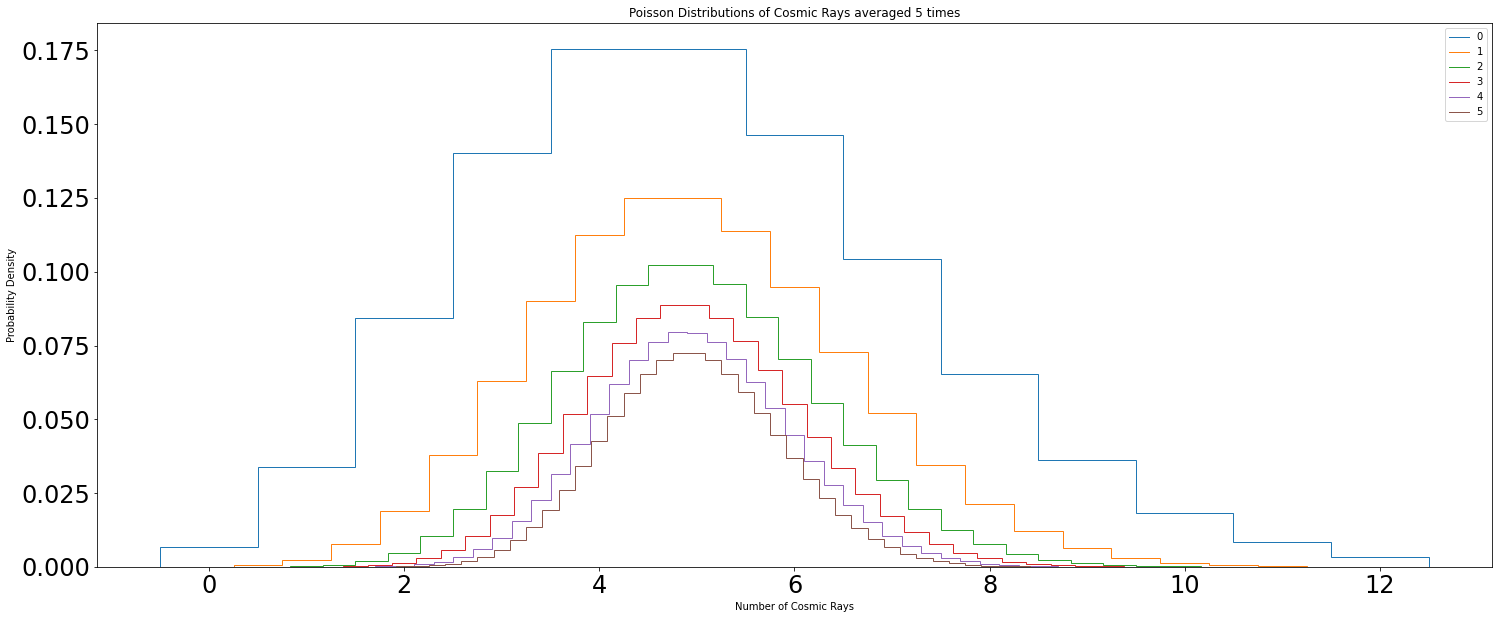

In [9]:
# Problem 1.C
plt.rcParams["figure.figsize"] = (25,10)
fig, ax = plt.subplots(1, 1)
ax.tick_params(labelsize = 24)

X = 5
x = np.arange(stats.poisson.ppf(0.001, X, 0), stats.poisson.ppf(0.999, X, 0))
edges = np.arange(x[0]-0.5, x[-1]+1.5, 1)
pmf_values = stats.poisson.pmf(x, X, 0)
ax.stairs(pmf_values, edges, label= 0)
conv = pmf_values
plt.title('Poisson Distributions of Cosmic Rays averaged 5 times')
plt.xlabel('Number of Cosmic Rays')
plt.ylabel('Probability Density')

for i in range(5):
    conv = np.convolve(conv, pmf_values)
    x = np.arange(0,len(conv))
    edges = np.arange(x[0]-0.5, x[-1]+1.5, 1)/(i+2)
    ax.stairs(conv, edges, label= i + 1)
plt.legend()
print(conv.sum())

Problem 1.C

The above plot shows the poisson distribution being averaged over a range from 1 to 6 days. With each iteration, the height and width of the distribution decrease as more days are averaged, but the number of  bins increases. The distribution also becomes more symmetrical, and begins to take on the shape of a Gaussian. In comparison to part B, the shape of the distribution, and the number of bins remains the same for each day, however the rescaling of the x-axis prevents the mean from shifting to the right, and causes the averages of the distributions to appear thinner rather than wider. With the central limit theorem in mind, it makes sense that the distribution would begin to take on the shape of a gaussian, as the theorem states that in the infinite limit, most distributions will colvolve into a gaussian distribution, however this can occur far before infinite convolutions are done.

In [10]:
# Problem 1.D

X = 5
Y = 8
N = 4
observed = Y*N

x = np.arange(stats.poisson.ppf(0.001, 25, 0), stats.poisson.ppf(0.999, 25, 0))
edges = np.arange(x[0]-0.5, x[-1]+1.5, 1)
pmf_values = stats.poisson.pmf(x, 25, 0)

probability = stats.poisson.sf(observed, 25)

sigma = abs(stats.norm.ppf(probability))
print(sigma)


1.4650324578029914


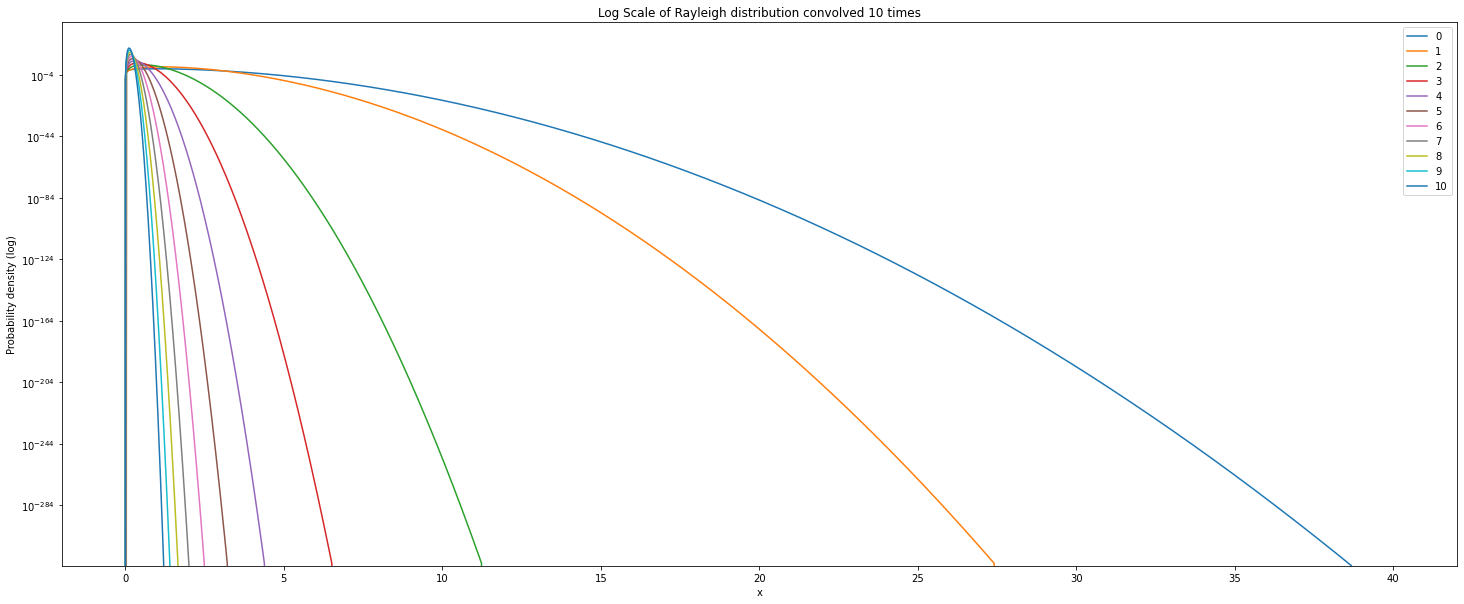

In [11]:
# Problem 2.A

x = np.linspace(0,40,1000)
d = stats.rayleigh.pdf(x)

plt.rcParams["figure.figsize"] = (25,10)
fig, ax = plt.subplots(1, 1)
ax.plot(x, d, label=0)
plt.yscale('log')
plt.title('Log Scale of Rayleigh distribution convolved 10 times')
plt.xlabel('x')
plt.ylabel('Probability density (log)')
conv = d

for i in range(10):
    #plt.rcParams["figure.figsize"] = (25,10)
    #fig, ax = plt.subplots(1, 1)
    conv = np.convolve(conv, d)
    x = np.linspace(0,40,len(conv)) / (i+1)
    ax.plot(x, conv, label= i + 1)


    plt.yscale('log')
    plt.legend()

Problem 2.B

The above plot shows the log scale of a rayleigh distribution being convolved 0-10 times. The height of the distribution becomes slightly higher with each iteration, and the width gets ruduced, but only on the left side. The right side remains vertical, and unchanged when looking at the log scale distribution, After trying multiple values of iteration, the distribution did not reach the shape of a Gaussian. Given enough convolutions however, it is conceivalble that the distribution would reach the shape of a gaussian as is stated by the central limit theorem. But given that the shape still very non gaussian, the number of convolutions would likely be immense.

4.1000000000000005


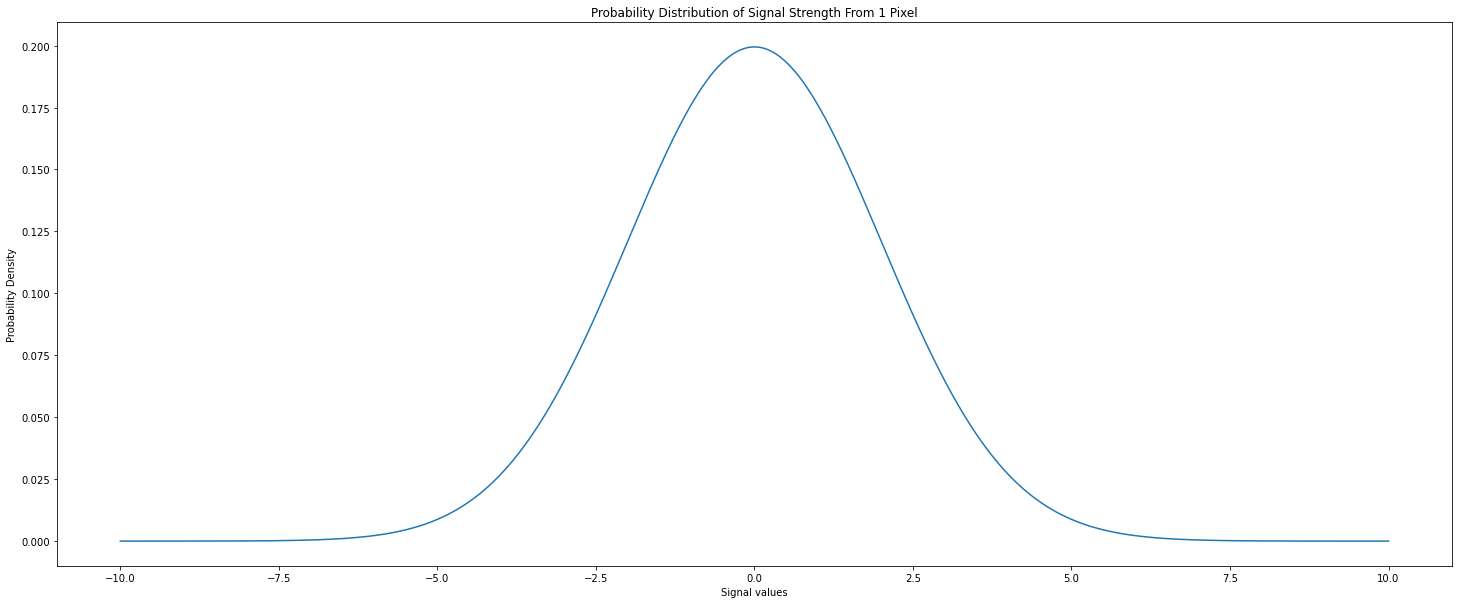

In [12]:
# Problem 3 Version 1

X = 2
Y = 8.2
x = np.linspace(-10,10, 1000)
d = stats.norm.pdf(x,scale=X)

plt.rcParams["figure.figsize"] = (25,10)
fig, ax = plt.subplots(1, 1)
ax.plot(x, d)

prob = stats.norm.sf(Y,scale=X)
sigma = abs(stats.norm.ppf(prob, scale=1))
plt.xlabel('Signal values')
plt.ylabel('Probability Density')
plt.title('Probability Distribution of Signal Strength From 1 Pixel')
print(sigma)

The above plot shows the probability distribution of the x ray signals from 1 pixel of the image.

Problem 3 Version 2.B

Statistical Question:
    Given the background follows a gaussian distribution with a zero mean, and standard deviation of 2. What is the probability that any pixel among the 10,000 observed contains a bightness value that is greater than 8.2?
    
The probability distribution is original distribution multiplied by 10,000, the new probability when taking trials factors into account is equal to the probability of the original distribution multiplied by the number of trials which in this case is 10,000.


In [13]:
# Problem 3 Version 2.C

prob = abs(stats.norm.cdf(Y, scale=X))
sigma10k = abs(stats.norm.ppf(prob/10000, scale=1))
print(sigma10k)

3.719021704051988


In [14]:
# Problem 4.A

sigma5_prob = (3.5*(10**-6))
signal1 = abs(stats.norm.ppf(sigma5_prob, scale=2))
print(signal1)

8.987377010471683


In [15]:
# Problem 4.B

sigma5_prob = (3.5*(10**-6))
signal2 = abs(stats.norm.ppf(sigma5_prob/10000, scale=2))
print(signal2)

# Problem 4.C
print(signal2 / signal1)

12.332176624480104
1.3721663851545576


Problem 4.C

The signal for 10 thousand pixels observed versus only one needs to be 1.372 times greater in order to be a 5 sigma observation, which is a fairly low increase in sensitivity penalty due to the increase in the order of magnitude. Mathematically, this makes sense, as the probabilities concerning rare events, are extremely small, so increasing there order of magnitude wouldn't significantly change the probability value, resulting in a small effect on sensitivity penalty.

In [16]:
# Problem 4.D

signal = []

# 1 million pixels
sigma5_prob = (3.5*(10**-6))
signal.append(abs(stats.norm.ppf(sigma5_prob/1000000, scale=2)))

# 10 million pixels
signal.append(abs(stats.norm.ppf(sigma5_prob/10000000, scale=2)))

# 100 million pixels
signal.append(abs(stats.norm.ppf(sigma5_prob/100000000, scale=2)))

# 1 billion pixels
signal.append(abs(stats.norm.ppf(sigma5_prob/1000000000, scale=2)))
print(signal)

differences = []
for i in range(len(signal) - 1):
    differences.append(signal[i+1] - signal[i])

sum_diffs = 0
for i in differences:
    sum_diffs += i
avg_diff = sum_diffs / len(differences)
print(avg_diff)

[13.715310236029127, 14.35887036458636, 14.975741158318254, 15.56896186312784]
0.6178838756995706


Section 4.D

The effect on the 5 sigma sensitivity threshold is not that great despite the order of magnitude increasing from 10 thousand up to 1 billion. The threshold increases on average by 0.618 per order of magnitude added.